# Ventilation durations

Query based on the MIMIC ventilation-durations approach to generate a list of start and stop times for mechanical ventilation.

## Notes from chat with Alon

### Invasive: 
- mean_airway_pressure 
- mv_mode (all simv; all prvc; ac; bi-vent;
- peak_pressure
- plateau_pressure
- ps
- rsbi

### Both invasive and non-invasive: 
- fio2
- mve
- peep

### Weaning trial:
- rsbi

In [8]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
import getpass
%matplotlib inline

In [2]:
# Create a database connection
user = 'postgres'
host = 'localhost'
dbname = 'eicu'
schema = 'public, eicu_crd_phi'

In [3]:
# Connect to the database
con = psycopg2.connect(dbname=dbname, user=user, host=host, 
                       password=getpass.getpass(prompt='Password:'.format(user)))
cur = con.cursor()
cur.execute('SET search_path to {}'.format(schema))

Password:········


In [4]:
with open('./ventilation-durations.sql', 'r') as f:
    buildviews = f.read()
cur.execute(buildviews)

In [5]:
query = \
"""
SELECT v.*
FROM ventdurations v;
"""

data = pd.read_sql_query(query,con)

In [6]:
data.head()

,patientunitstayid,ventnum,startoffset,endoffset,duration_minutes
0,1433759,1,98,518,420
1,1433775,1,163,5256,5093
2,1433775,2,6248,6690,442
3,1433777,1,45,2720,2675
4,1433812,1,290,2202,1912


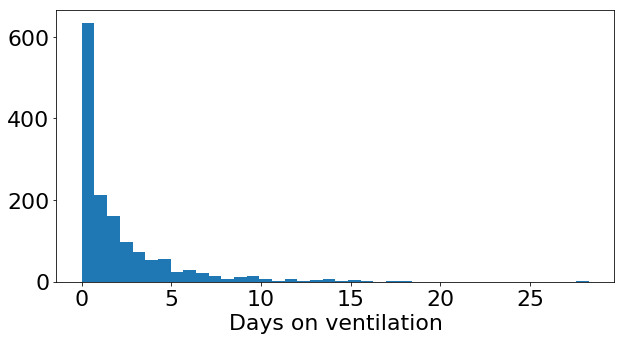

In [33]:
plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 22})
ax = plt.hist(data.duration_minutes.values/60/24, bins=40)
plt.xlabel('Days on ventilation', fontsize=22)